## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -0.719859 -0.296413 -1.229954  1.261991 -1.435288  0.113056
1  0.040235  1.674560  1.076148  0.911603 -0.911330  1.289509
2  0.440414 -0.981632  0.588977  0.013055  0.722638 -0.242455
3 -0.745525 -1.725805  0.693732 -1.563056 -0.940741 -2.324663
4  0.136511 -0.293535  1.530246 -1.081951  0.247741  0.156652


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0164623	total: 68.2ms	remaining: 1m 8s
1:	learn: 1.0048172	total: 68.9ms	remaining: 34.4s
2:	learn: 0.9938464	total: 69.4ms	remaining: 23.1s
3:	learn: 0.9831051	total: 70ms	remaining: 17.4s
4:	learn: 0.9734917	total: 70.6ms	remaining: 14.1s
5:	learn: 0.9633470	total: 71.1ms	remaining: 11.8s
6:	learn: 0.9514061	total: 71.6ms	remaining: 10.2s
7:	learn: 0.9403490	total: 72.3ms	remaining: 8.96s
8:	learn: 0.9305991	total: 72.8ms	remaining: 8.02s
9:	learn: 0.9217546	total: 73.4ms	remaining: 7.27s
10:	learn: 0.9113589	total: 74ms	remaining: 6.65s
11:	learn: 0.9005580	total: 74.5ms	remaining: 6.13s
12:	learn: 0.8921124	total: 75.1ms	remaining: 5.7s
13:	learn: 0.8819335	total: 75.6ms	remaining: 5.32s
14:	learn: 0.8726369	total: 76.2ms	remaining: 5s
15:	learn: 0.8638798	total: 76.7ms	remaining: 4.71s
16:	learn: 0.8554630	total: 77.1ms	remaining: 4.46s
17:	learn: 0.8481586	total: 77.5ms	remaining: 4.23s
18:	learn: 0.8393613	total: 78.1ms	remaining: 4.03s


86:	learn: 0.4492423	total: 109ms	remaining: 1.15s
87:	learn: 0.4450920	total: 110ms	remaining: 1.14s
88:	learn: 0.4415485	total: 110ms	remaining: 1.13s
89:	learn: 0.4381977	total: 111ms	remaining: 1.12s
90:	learn: 0.4342307	total: 111ms	remaining: 1.11s
91:	learn: 0.4300873	total: 111ms	remaining: 1.1s
92:	learn: 0.4263479	total: 112ms	remaining: 1.09s
93:	learn: 0.4226473	total: 112ms	remaining: 1.08s
94:	learn: 0.4189882	total: 113ms	remaining: 1.07s
95:	learn: 0.4152942	total: 113ms	remaining: 1.06s
96:	learn: 0.4124868	total: 114ms	remaining: 1.06s
97:	learn: 0.4095582	total: 114ms	remaining: 1.05s
98:	learn: 0.4063008	total: 114ms	remaining: 1.04s
99:	learn: 0.4036812	total: 115ms	remaining: 1.03s
100:	learn: 0.3998695	total: 116ms	remaining: 1.03s
101:	learn: 0.3970052	total: 116ms	remaining: 1.02s
102:	learn: 0.3936075	total: 116ms	remaining: 1.01s
103:	learn: 0.3904646	total: 117ms	remaining: 1.01s
104:	learn: 0.3870130	total: 117ms	remaining: 1000ms
105:	learn: 0.3844077	tota

255:	learn: 0.1389213	total: 187ms	remaining: 544ms
256:	learn: 0.1385517	total: 188ms	remaining: 543ms
257:	learn: 0.1381489	total: 188ms	remaining: 541ms
258:	learn: 0.1371535	total: 189ms	remaining: 540ms
259:	learn: 0.1365069	total: 189ms	remaining: 539ms
260:	learn: 0.1361289	total: 190ms	remaining: 537ms
261:	learn: 0.1354423	total: 190ms	remaining: 536ms
262:	learn: 0.1348548	total: 191ms	remaining: 535ms
263:	learn: 0.1338823	total: 191ms	remaining: 533ms
264:	learn: 0.1329786	total: 192ms	remaining: 531ms
265:	learn: 0.1326060	total: 192ms	remaining: 530ms
266:	learn: 0.1322582	total: 192ms	remaining: 528ms
267:	learn: 0.1317238	total: 193ms	remaining: 527ms
268:	learn: 0.1311460	total: 193ms	remaining: 526ms
269:	learn: 0.1307483	total: 194ms	remaining: 524ms
270:	learn: 0.1304549	total: 194ms	remaining: 522ms
271:	learn: 0.1295175	total: 195ms	remaining: 521ms
272:	learn: 0.1286283	total: 195ms	remaining: 520ms
273:	learn: 0.1277515	total: 196ms	remaining: 519ms
274:	learn: 

481:	learn: 0.0515512	total: 293ms	remaining: 314ms
482:	learn: 0.0514883	total: 293ms	remaining: 314ms
483:	learn: 0.0512190	total: 294ms	remaining: 313ms
484:	learn: 0.0511641	total: 294ms	remaining: 312ms
485:	learn: 0.0511100	total: 294ms	remaining: 311ms
486:	learn: 0.0508302	total: 295ms	remaining: 311ms
487:	learn: 0.0507124	total: 295ms	remaining: 310ms
488:	learn: 0.0506529	total: 296ms	remaining: 309ms
489:	learn: 0.0505037	total: 296ms	remaining: 308ms
490:	learn: 0.0504520	total: 297ms	remaining: 308ms
491:	learn: 0.0503903	total: 297ms	remaining: 307ms
492:	learn: 0.0501376	total: 298ms	remaining: 306ms
493:	learn: 0.0498003	total: 298ms	remaining: 305ms
494:	learn: 0.0496572	total: 299ms	remaining: 305ms
495:	learn: 0.0496077	total: 299ms	remaining: 304ms
496:	learn: 0.0495576	total: 300ms	remaining: 303ms
497:	learn: 0.0494267	total: 300ms	remaining: 302ms
498:	learn: 0.0491840	total: 300ms	remaining: 302ms
499:	learn: 0.0489246	total: 301ms	remaining: 301ms
500:	learn: 

650:	learn: 0.0284202	total: 371ms	remaining: 199ms
651:	learn: 0.0283023	total: 371ms	remaining: 198ms
652:	learn: 0.0281863	total: 372ms	remaining: 198ms
653:	learn: 0.0280499	total: 372ms	remaining: 197ms
654:	learn: 0.0278847	total: 373ms	remaining: 196ms
655:	learn: 0.0277570	total: 373ms	remaining: 196ms
656:	learn: 0.0276116	total: 374ms	remaining: 195ms
657:	learn: 0.0274998	total: 374ms	remaining: 194ms
658:	learn: 0.0273690	total: 374ms	remaining: 194ms
659:	learn: 0.0272593	total: 375ms	remaining: 193ms
660:	learn: 0.0271318	total: 375ms	remaining: 192ms
661:	learn: 0.0270516	total: 376ms	remaining: 192ms
662:	learn: 0.0270151	total: 376ms	remaining: 191ms
663:	learn: 0.0268576	total: 377ms	remaining: 191ms
664:	learn: 0.0267539	total: 377ms	remaining: 190ms
665:	learn: 0.0266444	total: 377ms	remaining: 189ms
666:	learn: 0.0265137	total: 378ms	remaining: 189ms
667:	learn: 0.0264093	total: 379ms	remaining: 188ms
668:	learn: 0.0262738	total: 379ms	remaining: 188ms
669:	learn: 

874:	learn: 0.0137352	total: 477ms	remaining: 68.1ms
875:	learn: 0.0136690	total: 477ms	remaining: 67.5ms
876:	learn: 0.0136106	total: 478ms	remaining: 67ms
877:	learn: 0.0135834	total: 478ms	remaining: 66.4ms
878:	learn: 0.0135350	total: 479ms	remaining: 65.9ms
879:	learn: 0.0134758	total: 479ms	remaining: 65.3ms
880:	learn: 0.0134187	total: 480ms	remaining: 64.8ms
881:	learn: 0.0133922	total: 480ms	remaining: 64.2ms
882:	learn: 0.0133317	total: 481ms	remaining: 63.7ms
883:	learn: 0.0132529	total: 481ms	remaining: 63.1ms
884:	learn: 0.0131938	total: 482ms	remaining: 62.6ms
885:	learn: 0.0131753	total: 482ms	remaining: 62ms
886:	learn: 0.0130982	total: 483ms	remaining: 61.5ms
887:	learn: 0.0130516	total: 483ms	remaining: 60.9ms
888:	learn: 0.0129923	total: 484ms	remaining: 60.4ms
889:	learn: 0.0129170	total: 484ms	remaining: 59.8ms
890:	learn: 0.0128844	total: 485ms	remaining: 59.3ms
891:	learn: 0.0128344	total: 485ms	remaining: 58.7ms
892:	learn: 0.0128168	total: 486ms	remaining: 58.2

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

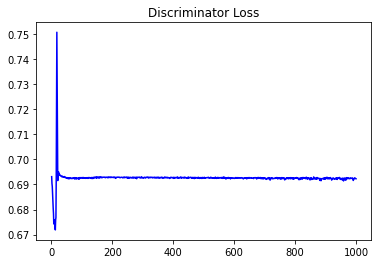

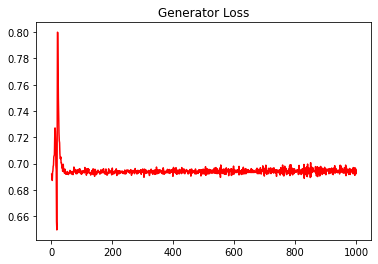

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.06819763644664964


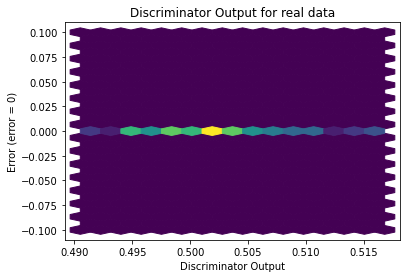

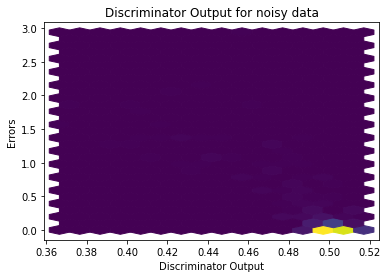

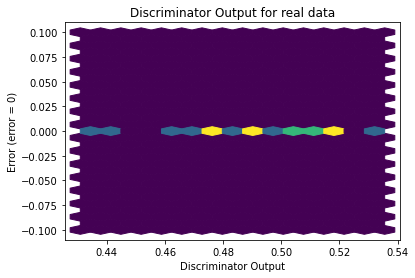

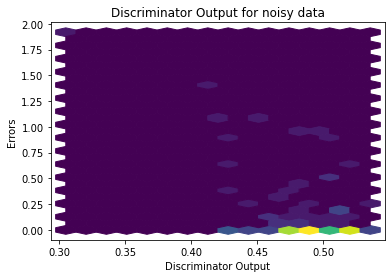

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


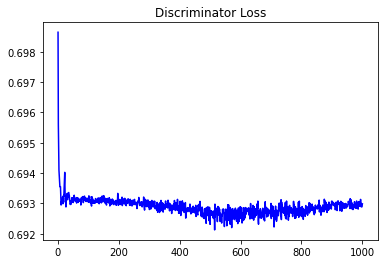

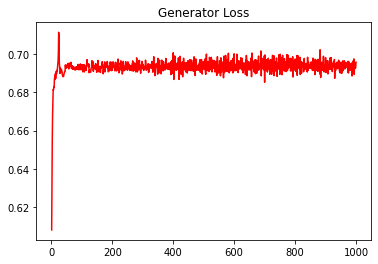

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.07537959434202943


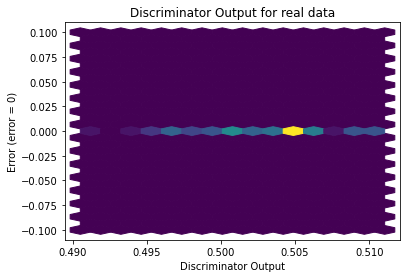

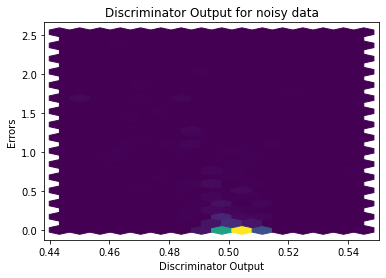

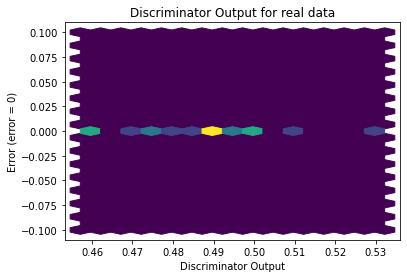

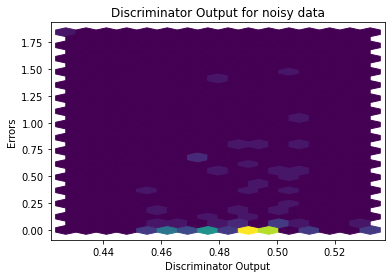

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1763]], requires_grad=True)
